In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Shanghai license plate price - Sheet3.csv')
df.head()

,Date,Total number of license issued,lowest price,avg price,Total number of applicants
0,Jan-02,1400,13600,14735,3718
1,Feb-02,1800,13100,14057,4590
2,Mar-02,2000,14300,14662,5190
3,Apr-02,2300,16000,16334,4806
4,May-02,2350,17800,18357,4665


In [4]:
df.isnull().sum()

Date                              0
Total number of license issued    0
lowest price                      0
avg price                         0
Total number of applicants        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            204 non-null    object
 1   Total number of license issued  204 non-null    int64 
 2   lowest price                    204 non-null    int64 
 3   avg price                       204 non-null    int64 
 4   Total number of applicants      204 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.1+ KB


In [6]:
df.describe()

,Total number of license issued,lowest price,avg price,Total number of applicants
count,204.000000,204.000000,204.000000,204.000000
mean,7634.323529,53375.000000,54358.044118,66769.436275
std,2615.136371,24577.035068,23772.554894,85081.873379
min,1400.000000,8100.000000,14057.000000,3525.000000
25%,5958.250000,34050.000000,34932.000000,10457.250000
50%,7876.500000,45050.000000,46036.500000,19324.000000
75%,9000.000000,77950.000000,78142.000000,115978.250000
max,16000.000000,93500.000000,93540.000000,277889.000000


In [7]:
df1 = df.iloc[:,0:2]
df1

,Date,Total number of license issued
0,Jan-02,1400
1,Feb-02,1800
2,Mar-02,2000
3,Apr-02,2300
4,May-02,2350
...,...,...
199,Sep-18,12712
200,Oct-18,10728
201,Nov-18,11766
202,Dec-18,12850


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df1['Total number of license issued'] = sc.fit_transform(df1[['Total number of license issued']])

In [9]:
df1.head()

,Date,Total number of license issued
0,Jan-02,0.000000
1,Feb-02,0.027397
2,Mar-02,0.041096
3,Apr-02,0.061644
4,May-02,0.065068


In [10]:
df1.set_index('Date')

,Total number of license issued
Date,
Jan-02,0.000000
Feb-02,0.027397
Mar-02,0.041096
Apr-02,0.061644
May-02,0.065068
...,...
Sep-18,0.774795
Oct-18,0.638904
Nov-18,0.710000


### Visualize the time Series

##### Check for Trends, Seasonality or Random Patter

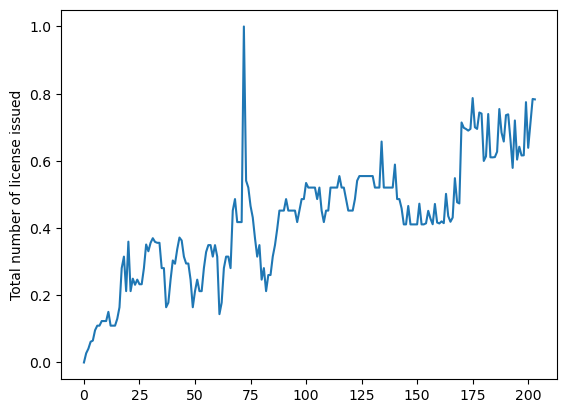

In [11]:
sns.lineplot(x=df1.index,y=df1['Total number of license issued'])
plt.show()

### Check for Stationarity

##### Method-1: Rolling Statistics

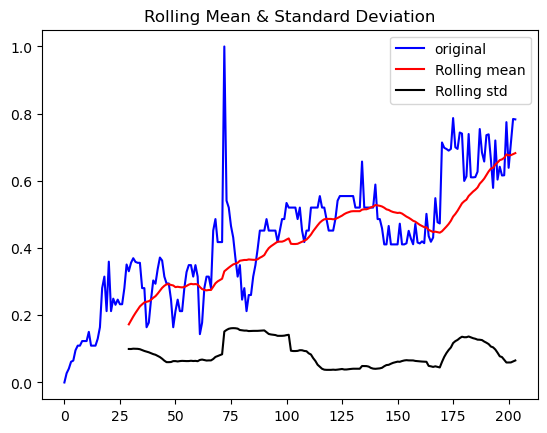

In [12]:
rolmean = df1['Total number of license issued'].rolling(window=30).mean()
rolstd = df1['Total number of license issued'].rolling(window=30).std()

#plot rolling statistics 

orig = plt.plot(df1['Total number of license issued'],color='blue',label='original')
mean = plt.plot(rolmean,color='red', label = 'Rolling mean') 
std = plt.plot(rolstd, color= 'black',label= 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

Method-2: Augmented Dicky Fuller Test

- for the ADF Test
    - HO: data is non-stationary
    - H1: data is stationary
- Based on P-value, we will accept or reject HO (if P-value<5% reject null Hypothesis)


In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df1['Total number of license issued'])
adfuller_result

(-1.3984461475918168,
 0.5830208277704558,
 11,
 192,
 {'1%': -3.4648754262570978,
  '5%': -2.876714157488788,
  '10%': -2.574858699001736},
 -457.87304083215497)

In [14]:
print('p-value:',adfuller_result[1])

p-value: 0.5830208277704558


###### Time series is not Stationary because p-value is greater than 0.05

### Now, we Have to convert Non-Stationary data to Stationary Data

###  Differencing

In [15]:
diff = df1['Total number of license issued'] - df1['Total number of license issued'].shift(3)
diff.dropna(inplace= True)

adfuller_result = adfuller(diff)
print('p-value of adf test:',adfuller_result[1])


p-value of adf test: 0.0004524129342521125


#### Now Time Series is Stationary 

### Plot ACF/PACF and find p,d,q parameters

C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


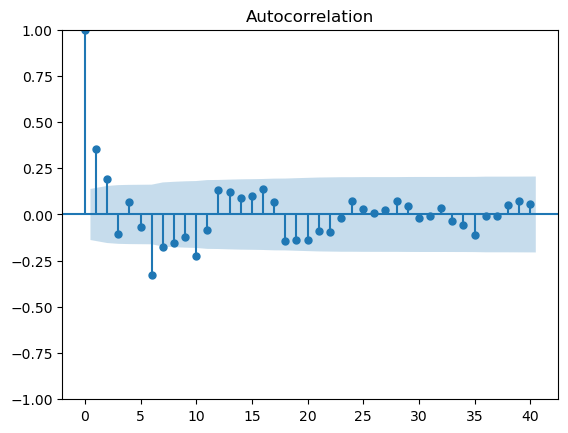

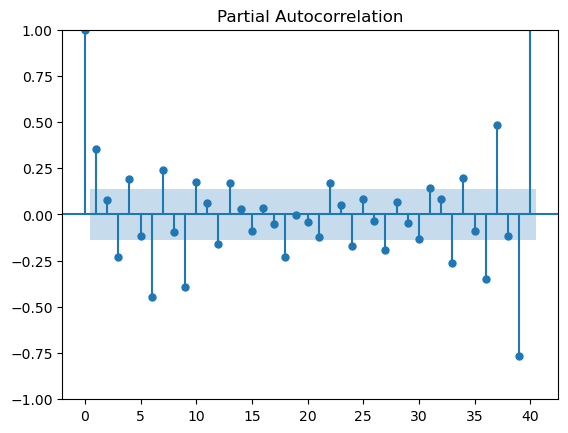

In [16]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm 
fig= sm.graphics.tsa.plot_acf(diff, lags=40)
fig = sm.graphics.tsa.plot_pacf(diff,lags=40)

From ' acf curve' optimal value of q = 1 and 
From ' pcf curve' optimal value of p = 1

### train test split 

split the data into train(80%) & test(20%)

- for time series data, we have use first 80% of records for training & next 20% of records for testing
- here 80% = 0.8*202 = 162 records,so first 162 records we have to use for traing

### Note: We should not apply train-test split function, because it divides the data randomly

In [17]:
y_train = diff[:161]
y_test = diff[161:]

#### Build ARIMA Model

ARIMA Model is Build by using p,d,q values
- p is AR Values ( Determined from PACF Plot ) 
- d is integration 
- q is MA Values ( Determined from ACF Plot ) 

#### Modelling 

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff,order=(1,3,1))
ARIMA = model.fit()

C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Prediction

In [19]:
ypred_train = ARIMA.predict(start = y_train.index[0],end=y_train.index[-1])
ypred_test = ARIMA.predict(start = y_test.index[0],end=y_test.index[-1])

C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Evaluation

In [20]:
from sklearn.metrics import r2_score
print('Train Accuracy ',r2_score(ypred_train,y_train))
print('Test Accuracy ',r2_score(ypred_test,y_test))

Train Accuracy  -0.7160422207621666
Test Accuracy  -0.6616546253273892


### SARIMAX Model

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(diff,seasonal_order=(1,3,1,30))
SARIMAX = model.fit()

C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


### Prediction

In [22]:
ypred_train = SARIMAX.predict(start=y_train.index[0],end=y_train.index[-1])
ypred_test = SARIMAX.predict(start=y_test.index[0],end=y_test.index[-1])

C:\Users\Dhananjay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Evaluation

In [23]:
from sklearn.metrics import r2_score
print('Train R2 of SARIMAX model ',r2_score(ypred_train,y_train))
print('Test R2 of SARIMAX model ',r2_score(ypred_test,y_test))

Train R2 of SARIMAX model  -0.10804366637543716
Test R2 of SARIMAX model  -0.5681831840578002


### RRN